In [30]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



Data preprocessing

In [2]:
# Loading data

route = 'Data/creditcard.csv'

data_raw = pd.read_csv(route)

data_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Target class distribution
round(data_raw['Class'].value_counts(normalize = True) * 100, 3)

0    99.827
1     0.173
Name: Class, dtype: float64

In [5]:
# So, there's a great imbalance in the target classes

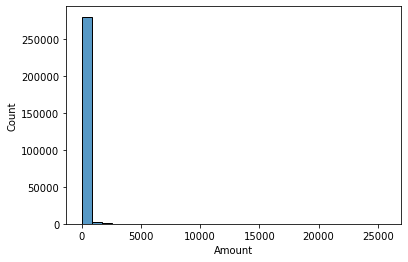

In [6]:
# Amount distribution
sns.histplot(data = data_raw['Amount'], bins = 30);

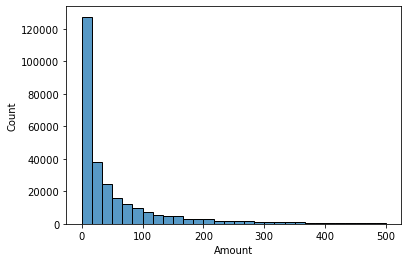

In [7]:
sns.histplot(data = data_raw['Amount'].loc[data_raw['Amount'] < 500], bins = 30);

In [8]:
data_raw['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
# Working data set
data = data_raw.loc[: , data_raw.columns != 'Time'].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

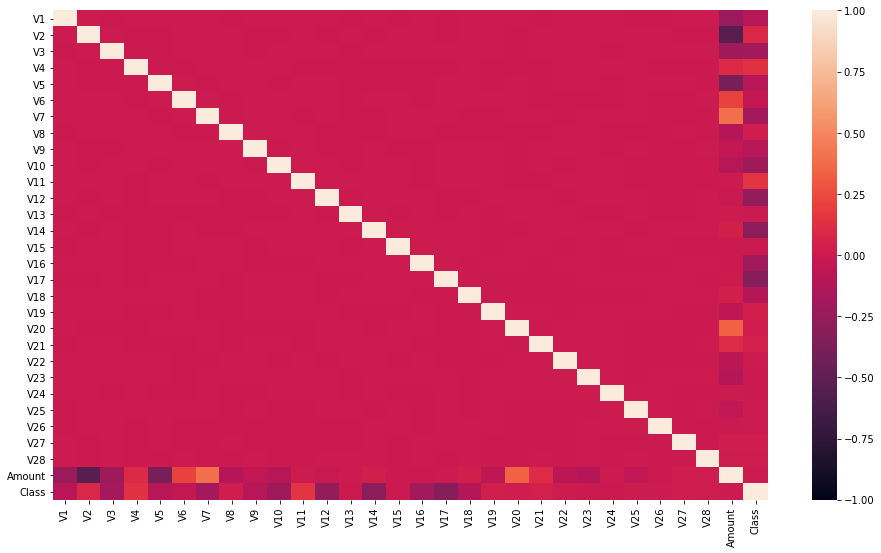

In [10]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(16,9))

sns.heatmap(data.corr(), vmin = -1, vmax = 1, ax = ax);

In [11]:
# Scaling the variable 'Amount'
scaler = RobustScaler()

data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

# Model W/O class balancing

In [12]:
target = 'Class'
X = data.loc[: , data.columns != target].copy()
y = data.loc[: , data.columns == target].copy()

In [13]:
model_NN = MLPClassifier(max_iter = 500)
model_LogReg = LogisticRegression(max_iter = 300)
model_DecTRee = DecisionTreeClassifier()
model_RandomForest = RandomForestClassifier()

Model runs

In [14]:
models = {'Neural Network' : model_NN, 'Logistic Regression' : model_LogReg, 'Decision Tree' : model_DecTRee, 'Random Forest' : model_RandomForest}

In [15]:
def run_models(models, X_train, X_test, y_train, y_test):

    data_models = []
    
    for key, value in models.items():
#         print('Modelo:', key)
        model = value
        model.fit(X_train, np.ravel(y_train))
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
                        
        print('Modelo: ', key)
        print(classification_report(y_test, y_pred))
        print('\n')
        
        pos_class_recall = round(recall_score(y_test, y_pred, pos_label = 1, average = 'binary'), 4)
        recall = round(recall_score(y_test, y_pred, average = 'micro'), 4)
        prec_score = round(average_precision_score(y_test, y_pred_proba[:,1]), 4)
        roc_score =  round(roc_auc_score(y_test, y_pred), 4)
#         print('Recall score:', recall)
#         print('Area under Prec-Recall curve (AUC PR):', prec_score)
#         print('Area under ROC curve (AUC ROC):', roc_score)
        
        prec, rec, thr = precision_recall_curve(y_test, y_pred_proba[:,1])
    
        df1 = pd.DataFrame(dict(fpr = prec, tpr = rec))
    
        prec, rec, thr = roc_curve(y_test, y_pred_proba[:,1])
    
        df2 = pd.DataFrame(dict(fpr = prec, tpr = rec, thr = thr))
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
     
        title = 'Curva Precision-Recall & ROC para ' + key + '\n'
        fig.suptitle(title, fontsize = 14)
    
        ax1.axis([0, 1.01, 0, 1.01])
        ax1.set_xlabel('Recall')
        ax1.set_ylabel('Precision')
        title = 'Curva Precision-Recall para ' + key + '\n'
        ax1.set_title(title)
        ax1.plot(df1['fpr'],df1['tpr'])
        
        ax2.axis([0, 1.01, 0, 1.01])
        ax2.set_xlabel('1 - Specificty')
        ax2.set_ylabel('TPR / Sensitivity')
        title = 'Curva ROC para' + key + '\n'
        ax2.set_title(title)
        ax2.plot(df2['fpr'],df2['tpr'])
        ax2.plot(np.arange(0, 1, step = 0.01), np.arange(0, 1, step = 0.01))
        
        plt.show()
        data_model_run = pd.Series(data = [pos_class_recall, recall, prec_score, roc_score], index = ['+ class Recall', 'Overall Recall', 'AUC PR', 'AUC ROC'], name = key)
        data_models.append(data_model_run)
        
        print('\n')
        print('+++++++++++++++')
        print('\n')
    
    data_models = pd.DataFrame(data = data_models, columns = ['+ class Recall', 'Overall Recall', 'AUC PR', 'AUC ROC'])
    return data_models

Modelo:  Neural Network
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443





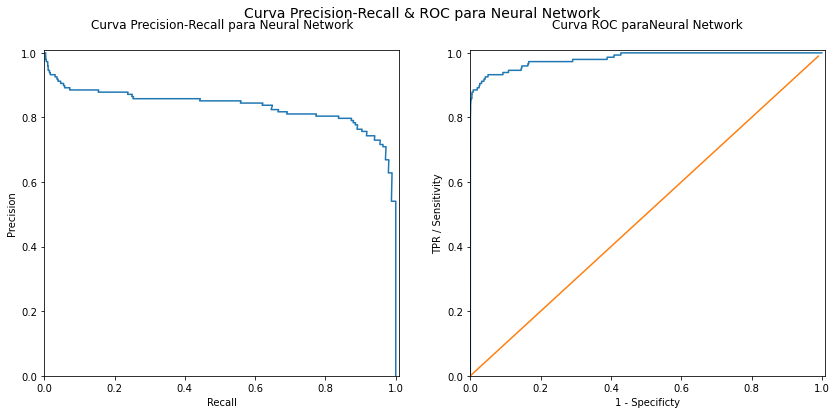



+++++++++++++++


Modelo:  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443





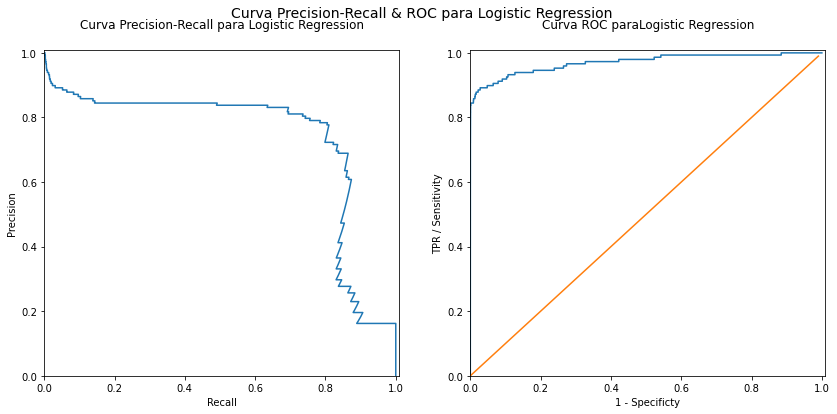



+++++++++++++++


Modelo:  Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.76      0.76       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443





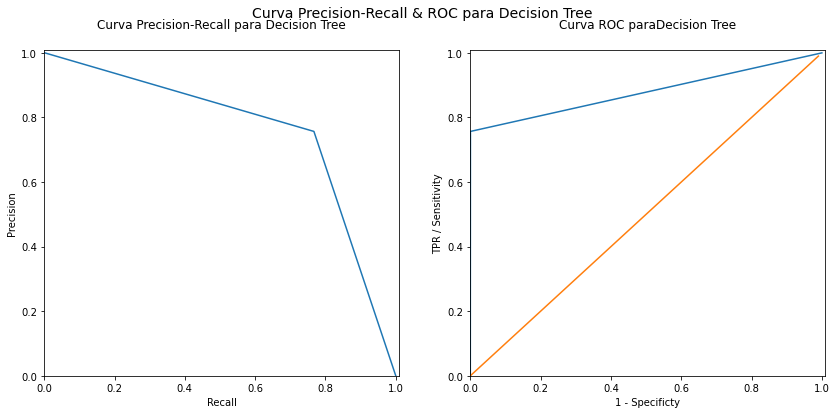



+++++++++++++++


Modelo:  Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443





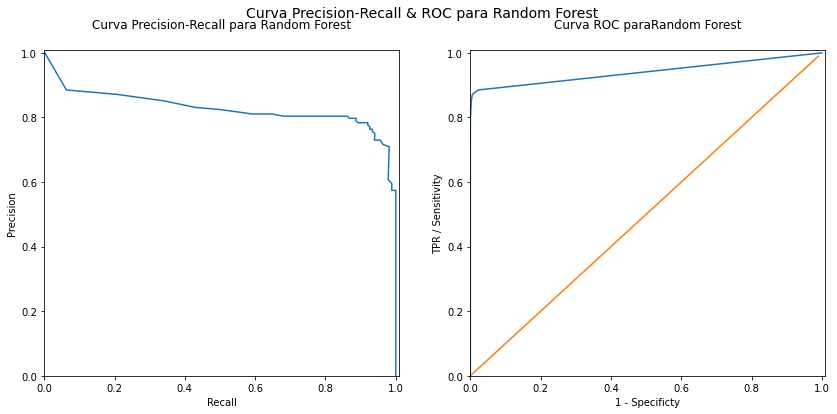



+++++++++++++++




In [16]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 0, stratify = y)
data_model = run_models(models, X_train, X_test, y_train, y_test)

In [17]:
data_model

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.8041,0.9994,0.8358,0.9019
Logistic Regression,0.6081,0.9992,0.7401,0.8040
Decision Tree,0.7568,0.9992,0.5809,0.8782
Random Forest,0.7297,0.9995,0.8207,0.8648


# Model w/undersampling

In [18]:
sampler = RandomUnderSampler()

In [19]:
X_train_us, y_train_us = sampler.fit_resample(X_train, y_train)

Modelo:  Neural Network
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.93      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.95      0.97     85443





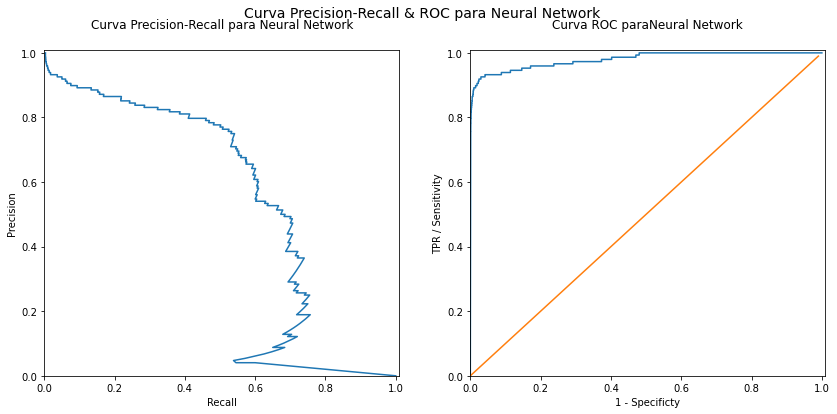



+++++++++++++++


Modelo:  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.91      0.08       148

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443





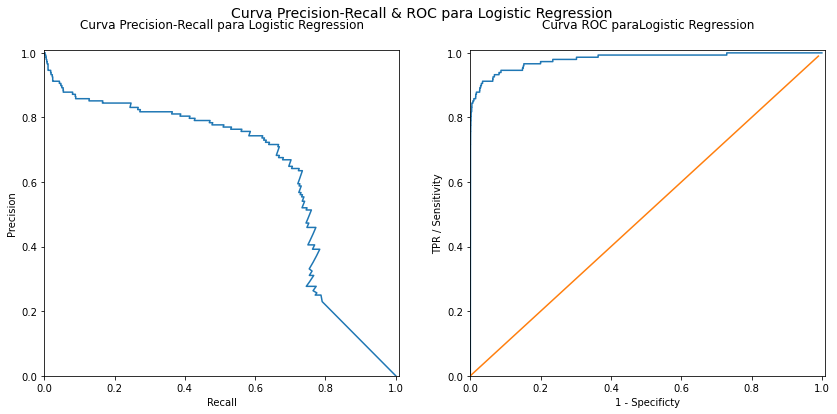



+++++++++++++++


Modelo:  Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85295
           1       0.02      0.88      0.03       148

    accuracy                           0.90     85443
   macro avg       0.51      0.89      0.49     85443
weighted avg       1.00      0.90      0.95     85443





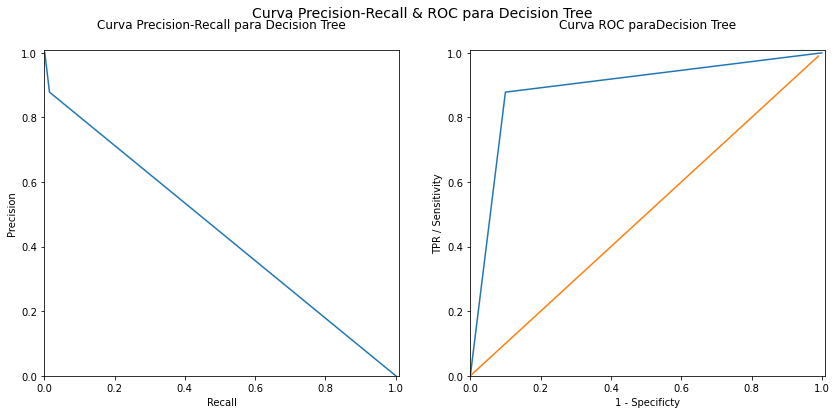



+++++++++++++++


Modelo:  Random Forest
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443





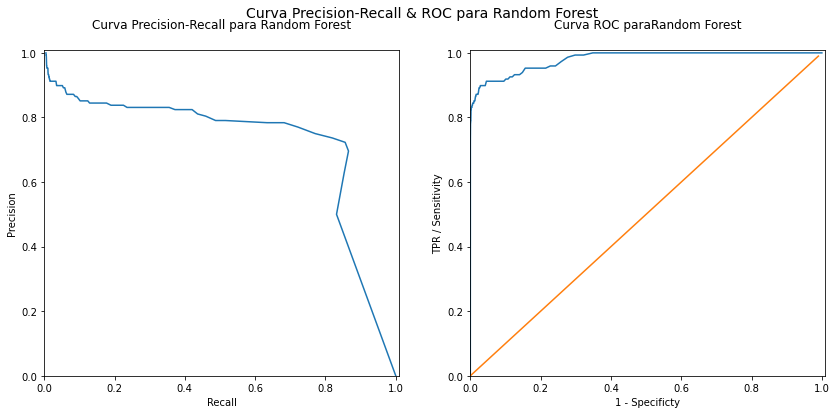



+++++++++++++++




In [20]:
data_model_us = run_models(models, X_train_us, X_test, y_train_us, y_test)

In [21]:
data_model_us

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.9324,0.9492,0.5492,0.9408
Logistic Regression,0.9122,0.9616,0.6098,0.9369
Decision Tree,0.8784,0.9001,0.0134,0.8893
Random Forest,0.8919,0.9749,0.6812,0.9335


# Model w/oversampling

In [22]:
sampler = RandomOverSampler()

In [23]:
X_train_os, y_train_os = sampler.fit_resample(X_train, y_train)

Modelo:  Neural Network
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.78      0.76       148

    accuracy                           1.00     85443
   macro avg       0.86      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443





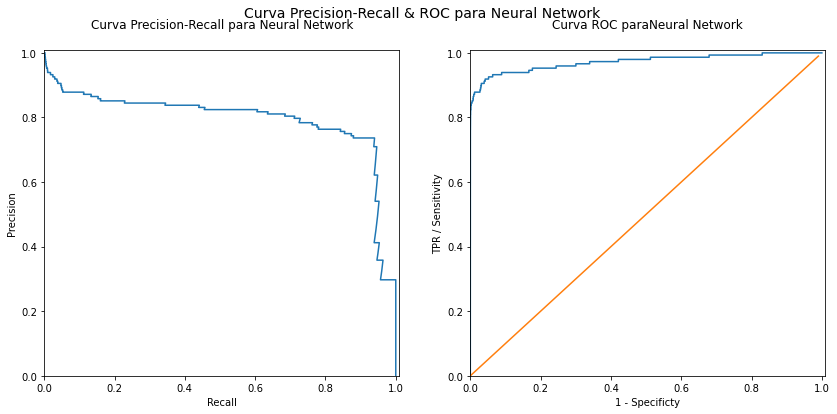



+++++++++++++++


Modelo:  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.90      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443





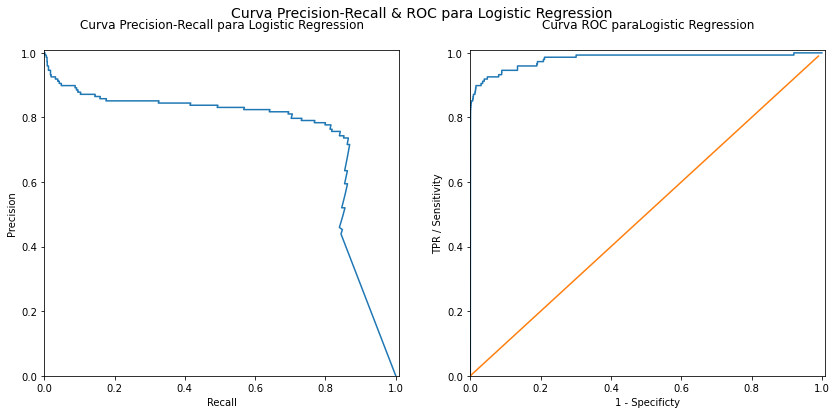



+++++++++++++++


Modelo:  Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.72      0.75       148

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443





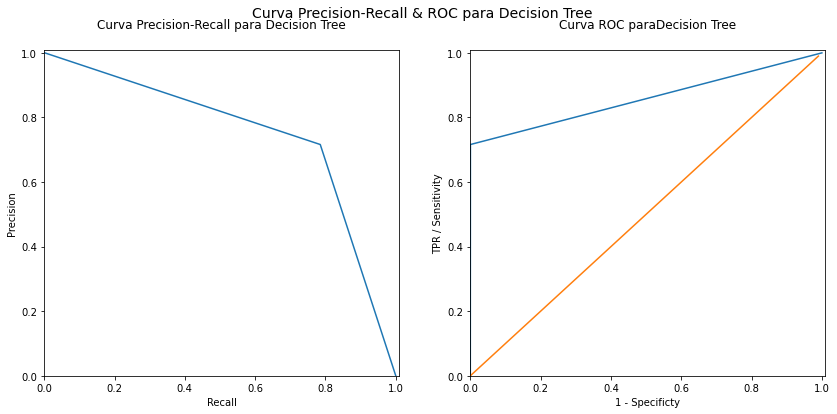



+++++++++++++++


Modelo:  Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443





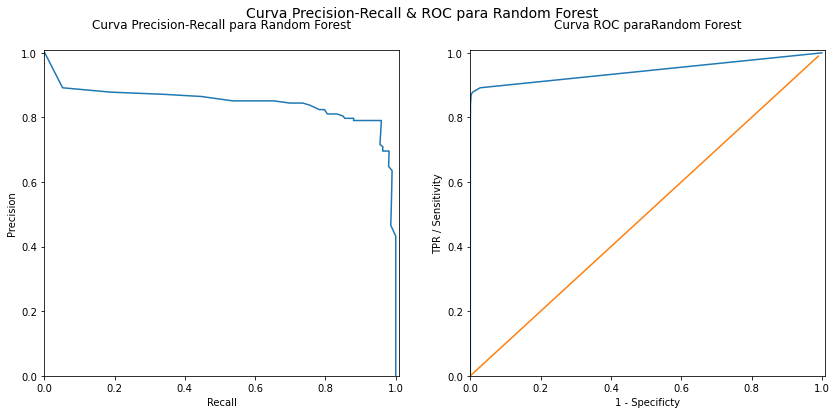



+++++++++++++++




In [24]:
data_model_os = run_models(models, X_train_os, X_test, y_train_os, y_test)

In [25]:
data_model_os

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.7838,0.9991,0.7965,0.8916
Logistic Regression,0.8986,0.9789,0.7131,0.9388
Decision Tree,0.7162,0.9992,0.5629,0.8579
Random Forest,0.7568,0.9995,0.8411,0.8783


# Model w/PCA dimension reduction

In [51]:
pca = PCA(n_components = 5)

In [52]:
X_reduced = pca.fit_transform(X)
X_train_red, X_test_red, y_train, y_test = train_test_split (X_reduced, y, test_size = 0.3, random_state = 0, stratify = y)

Modelo:  Neural Network
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.46      0.58       148

    accuracy                           1.00     85443
   macro avg       0.90      0.73      0.79     85443
weighted avg       1.00      1.00      1.00     85443





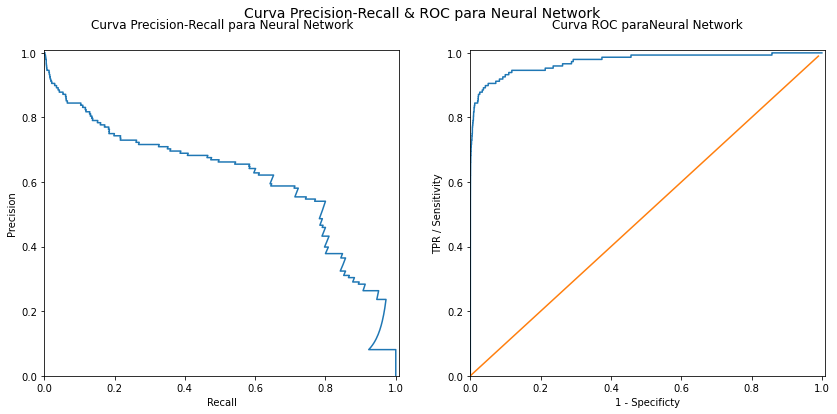



+++++++++++++++


Modelo:  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.34      0.47       148

    accuracy                           1.00     85443
   macro avg       0.87      0.67      0.73     85443
weighted avg       1.00      1.00      1.00     85443





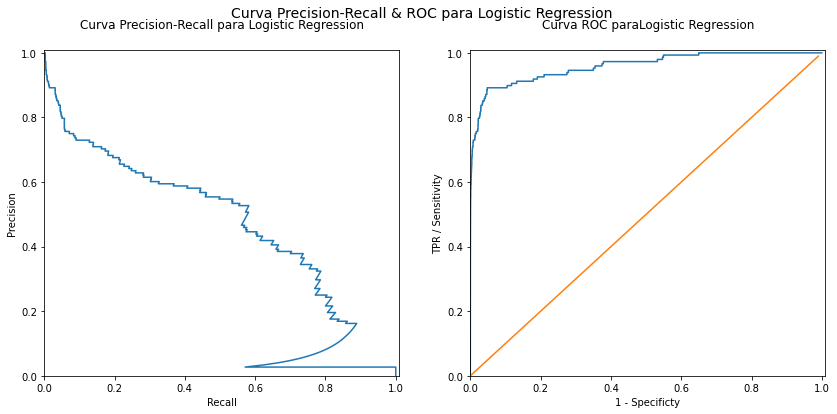



+++++++++++++++


Modelo:  Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.51      0.51      0.51       148

    accuracy                           1.00     85443
   macro avg       0.75      0.75      0.75     85443
weighted avg       1.00      1.00      1.00     85443





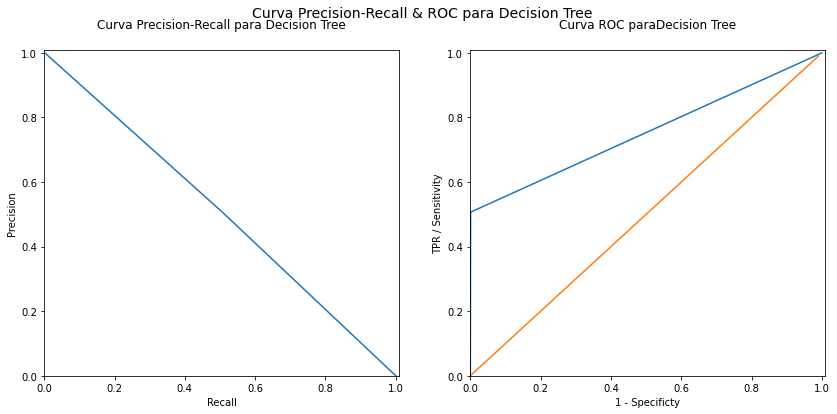



+++++++++++++++


Modelo:  Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.45      0.60       148

    accuracy                           1.00     85443
   macro avg       0.95      0.73      0.80     85443
weighted avg       1.00      1.00      1.00     85443





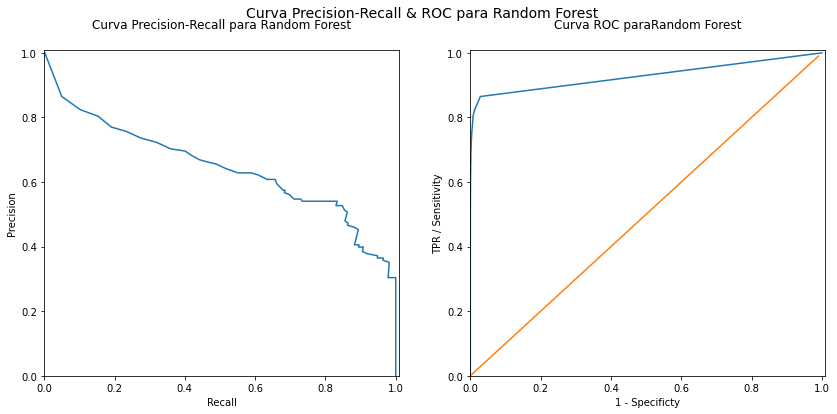



+++++++++++++++




In [53]:
data_model_pca = run_models(models, X_train_red, X_test_red, y_train, y_test)

In [54]:
data_model_pca

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.4595,0.9989,0.6125,0.7296
Logistic Regression,0.3446,0.9987,0.4676,0.6722
Decision Tree,0.5068,0.9983,0.2577,0.7530
Random Forest,0.4527,0.9990,0.6361,0.7263


# Overall results

In [55]:
data_model_os

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.7838,0.9991,0.7965,0.8916
Logistic Regression,0.8986,0.9789,0.7131,0.9388
Decision Tree,0.7162,0.9992,0.5629,0.8579
Random Forest,0.7568,0.9995,0.8411,0.8783


In [56]:
data_model_us

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.9324,0.9492,0.5492,0.9408
Logistic Regression,0.9122,0.9616,0.6098,0.9369
Decision Tree,0.8784,0.9001,0.0134,0.8893
Random Forest,0.8919,0.9749,0.6812,0.9335


In [57]:
data_model

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.8041,0.9994,0.8358,0.9019
Logistic Regression,0.6081,0.9992,0.7401,0.8040
Decision Tree,0.7568,0.9992,0.5809,0.8782
Random Forest,0.7297,0.9995,0.8207,0.8648


In [58]:
data_model_pca

,+ class Recall,Overall Recall,AUC PR,AUC ROC
Neural Network,0.4595,0.9989,0.6125,0.7296
Logistic Regression,0.3446,0.9987,0.4676,0.6722
Decision Tree,0.5068,0.9983,0.2577,0.7530
Random Forest,0.4527,0.9990,0.6361,0.7263


In [29]:
'''
Ver articulo en https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210X.13140
'''

'\nVer articulo en https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210X.13140\n'